In [6]:
import numpy as np
from scipy import signal
import wav_handler as wh

In [4]:
def cross_correlate(s1, s2):
    return signal.csd(s1, s2, fs, nperseg=512)



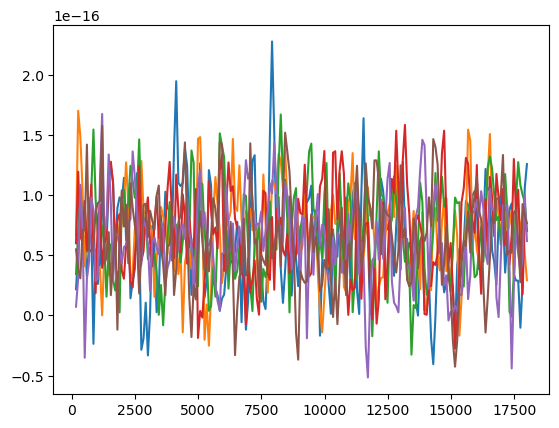

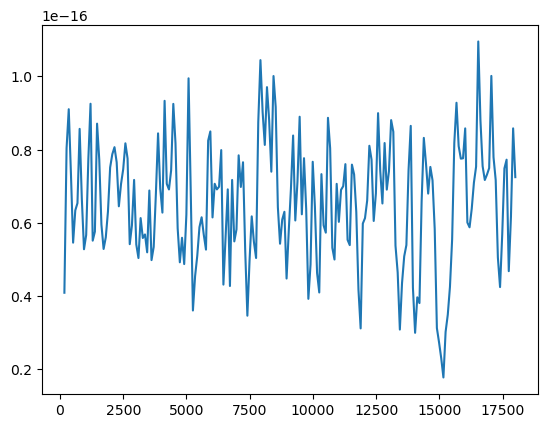

In [37]:
from scipy.signal import argrelextrema, welch
from numpy.fft import fft, ifft
import scipy.stats
import amplifier_model as am
import matplotlib.pyplot as plt

subsect = 6
fs = 44100

start = 2 # to clip PSDs
end = 210

fname = "0.0520Kohm.wav"
t_all, d_all = wh.importWAV("../data_soundcard/johnson_noise_roundtwo/" + fname)

t_splits, dr_splits, dl_splits = np.array_split(t_all, subsect), np.array_split(d_all["right"],subsect), np.array_split(d_all["left"],subsect)

f_list, Pxxs = [], []


for t, dr, dl in zip(t_splits, dr_splits, dl_splits):
    f, Pxx_den = cross_correlate(dr, dl)
    gain_model_squared = am.gain50(f, *am.measured_params)**2
    poly_gain_squared = am.polymod(f)**2
    Pxx_den = Pxx_den / poly_gain_squared
    f = f[start:end]
    Pxx_den = Pxx_den[start:end]
    f_list.append(f)
    Pxxs.append(Pxx_den)
    plt.plot(f, Pxx_den)

plt.show()
plt.plot(np.mean(f_list, axis=0), np.mean(Pxxs, axis=0))
# print(scipy.stats.mode(np.diff(f)).mode)
gain_model_squared = am.gain50(f, *am.measured_params)**2
poly_gain_squared = am.polymod(f)**2